### Programming for Data Analysis Project 2

### Wisconsin Breast Cancer Dataset Analysis

In [1]:
# about data, overview and background
# import data with pandas
# preprocessing, cleaning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.neighbors as nei
import sklearn.model_selection as mod

### 1. Introduction

Breast cancer is one of the most common types of cancer among women. It can be described as changing and abnormal growth of breast cells while grouping of these cells leads to tumour formation. [[1]](https://www.cancer.ie/cancer-information-and-support/cancer-types/breast-cancer) Breast cancer research by Wolberg, Street and Mangasarian from University of Wisconsin conducted in 1990s by analysing characteristics of cell nuclei in a digitized image of a fine needle aspirate of a breast mass is often used in machine learning and data analytics. [[2]](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) Diagnostic dataset was taken with the description of attributes that were measured in order to predict between two types of tumours, benign or malignant. Various classification machine learning algorithms were performed over the years on these data with different level of accuracy: Decision trees, Naïve Bayes, Support Vector Machine, Logistic regression and k-Nearest Neighbors.

### 2. Exploring Data

If we take a look at the attributes description from UCI Machine Learning Repository for our dataset, there are 569 instances with 32 attributes: Id number, Diagnosis (M for malignant and B for benign) and ten characteristics for every individual cell nucleus: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry and fractal dimension.

To check the dataset we are going to import it using pandas library.

In [3]:
cancer = pd.read_csv('data_breast_cancer.csv')

To diplay the first couple of rows we used the head function.

In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


There are 33 columns in our dataset with parameters that describe the image of the nuclei. To check the total number of rows and columns we used the shape method.

In [5]:
cancer.shape

(569, 33)

To see what types of data we have, we used dtypes() method.

In [6]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

All of our attributes appear to have float data type except id which is integer and diagnosis that is an object.

The names of the columns:

In [7]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

After we checked the columns names it is easier to understand why do we have 33 of them even if there is only ten attributes described besides 'id' and 'diagnosis'. The attributes repeat after the 'fractal_dimension_mean' but with different name ending, for example 'radius_se' and 'radius_worst'. That is because the first ten measured attributes refer to their mean, another ten to their standard error (with the _se ending) and the last ten represent the mean of the three largest values, for example 'radius_worst'. [[3]](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) 

By taking a closer look at data we see that the last column 'Unnamed:32' displays NaN values. Since we checked only the first five rows, we are going to explore if the missing values of the column apply to the entire dataset by using isnull() method. 

In [8]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

From the sum of missing values it is obvious that the 'Unnamed:32' column contain only missing values, therefore we decided to drop this column from the dataset.

In [9]:
cancer = cancer.drop(cancer.columns[32], axis=1)

In [10]:
cancer.shape

(569, 32)

In [11]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Next, we can count how many diagnosis appear to be malignant and how many benign. 

In [12]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

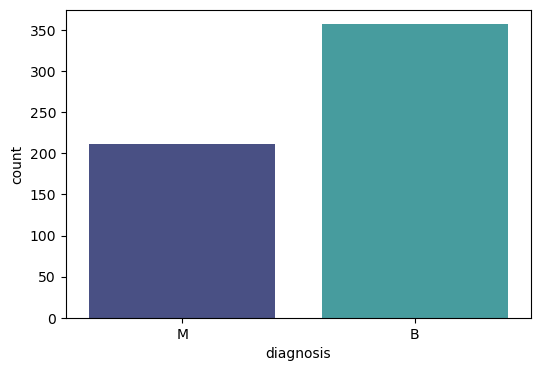

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=cancer['diagnosis'], palette='mako');

### References:


 * McGinley, B.(2022). Lectures; Project II, Programming for Data Analysis, Atlantic Technological University
 
 
 [1] Irish Cancer Society. (n.d.). Breast Cancer. What is breast cancer? Retrieved January 8, 2023 from https://www.cancer.ie/cancer-information-and-support/cancer-types/breast-cancer    
 [2] Wolberg, W.H, Street, W.N., Mangasarian, O.L. (1995). Breast Cancer Wisconsin (Diagnostic) Data Set. UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science. Retrieved December 20, 2022 from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29  
 [3] UCI Machine Learning. (n.d.). Breast Cancer Wisconsin (Diagnostic) Data Set. Kaggle. Retrieved, December 20, 2022 from https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data  
    
    


